### Title: Bankruptcy Analysis: Using PCA and LDA for classifying bankrutpcy

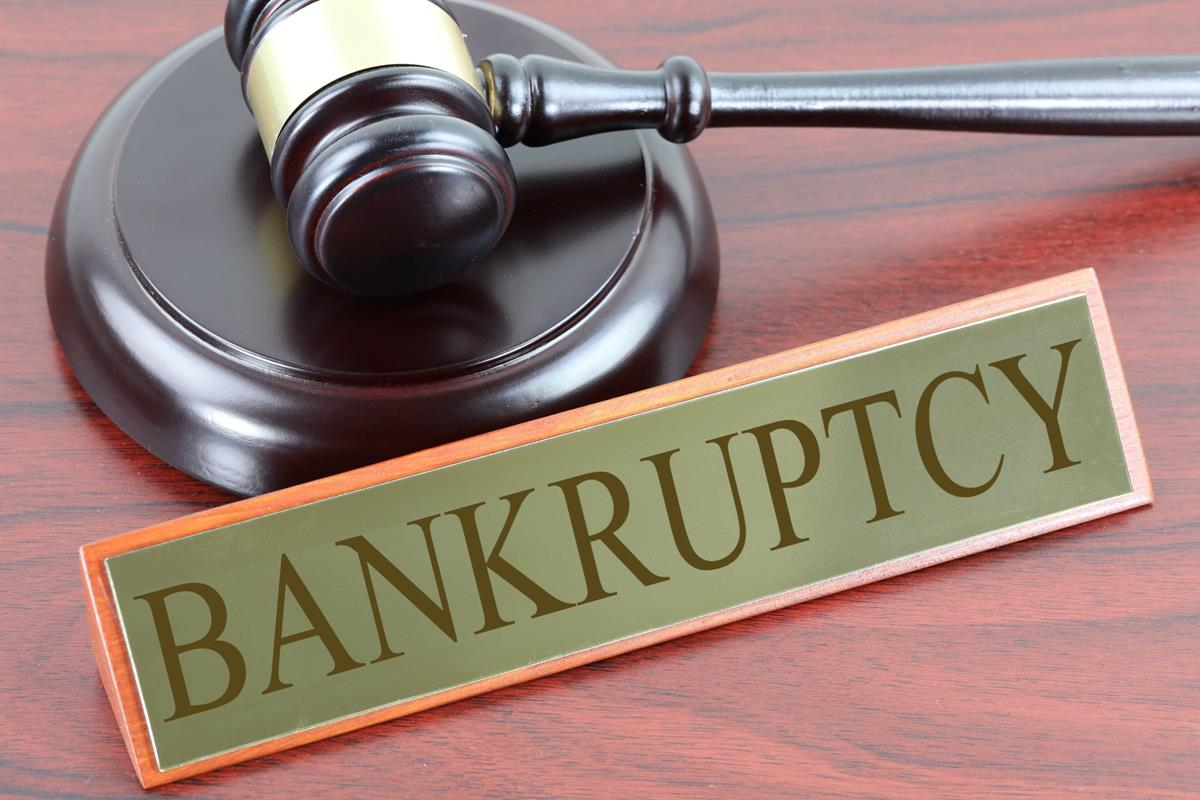

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Taiwan_bankruptcy_data.csv")

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Early data analysis 

In [4]:
df.shape

(6819, 96)

In [5]:
#df.info()

In [6]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [7]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [9]:
# Unique values in bankruptcy (class)
df["Bankrupt?"].unique()

array([1, 0], dtype=int64)

### Data Visualisation

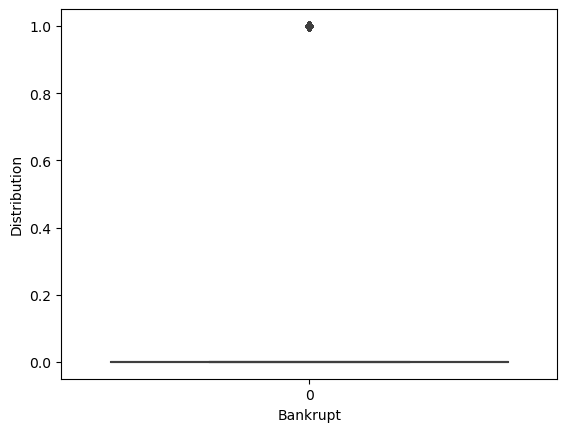

In [10]:
sns.boxplot(data=df["Bankrupt?"])
plt.xlabel("Bankrupt")
plt.ylabel("Distribution")
plt.show()

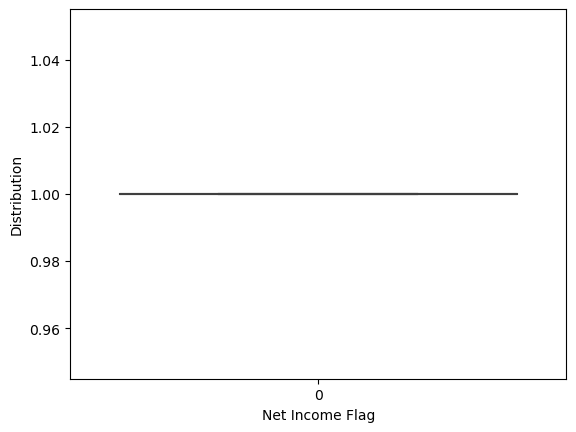

In [11]:
sns.boxplot(data=df[" Net Income Flag"])
plt.xlabel("Net Income Flag")
plt.ylabel("Distribution")
plt.show()

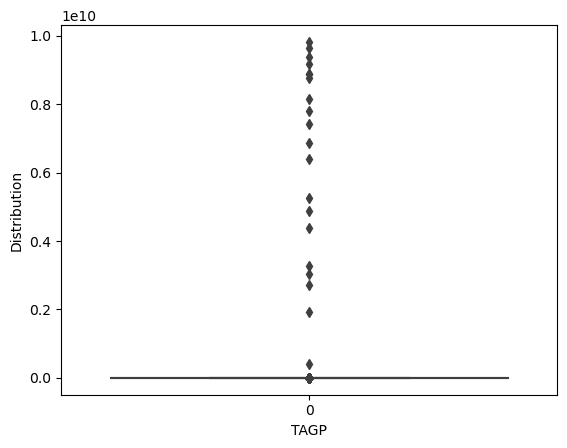

In [12]:
sns.boxplot(data=df[" Total assets to GNP price"])
plt.xlabel("TAGP")
plt.ylabel("Distribution")
plt.show()

In [13]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0, 0.5, 'count')

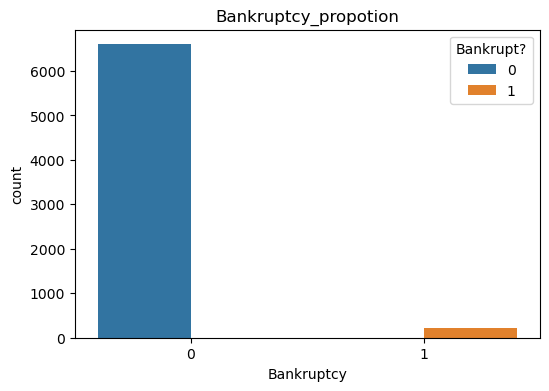

In [14]:
plt.figure(figsize=(6,4)) 
sns.countplot(x='Bankrupt?', data=df, hue= 'Bankrupt?')

plt.title('Bankruptcy_propotion')
plt.xlabel('Bankruptcy')
plt.ylabel('count')

In [15]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [16]:
x = df.drop(["Bankrupt?"], axis = 1)
y = df['Bankrupt?']

In [18]:
x

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [22]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection  import train_test_split

In [23]:
# SMOTE (to balance the data)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 5)
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [24]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

In [25]:
# Train the model using the training sets
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# Predict the response for test dataset
#y_pred = kNN.predict(X_test)

In [30]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [31]:
d_type = df.dtypes

In [32]:
obj_d_type = d_type[d_type == object]

In [33]:
print(obj_d_type)

Series([], dtype: object)


In [34]:
flt_d_type = d_type[d_type == float]

In [35]:
print(flt_d_type)

 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
                                                             ...   
 Net Income to Stockholder's Equity                         float64
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Equity to Liability                                        float64
Length: 93, dtype: object


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()

In [38]:
# Train the model using the training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Predict the response for test dataset
y_pred = dt.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1318
           1       0.24      0.48      0.32        46

    accuracy                           0.93      1364
   macro avg       0.61      0.71      0.64      1364
weighted avg       0.96      0.93      0.94      1364



In [44]:
np.bincount(y_train)

array([5281, 5281], dtype=int64)

In [46]:
X_test, y_test = smt.fit_resample(X_test, y_test)

In [47]:
np.bincount(y_test)

array([1318, 1318], dtype=int64)

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred = dt.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1318
           1       0.94      0.69      0.80      1318

    accuracy                           0.82      2636
   macro avg       0.85      0.82      0.82      2636
weighted avg       0.85      0.82      0.82      2636



As seen in the the plots and statistical analysis, the data are highly dimensional and some are skwed and alomost impossible to eplore individually. 

##### Plan:
1. Drop the claSS variable 
2. scale the data ( MinMax Scaler)
3. PCA Principal component analysis


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
indep = df.drop(['Bankrupt?'], axis = 1)

In [53]:
MMS= MinMaxScaler()

In [54]:
Bank_scaled= MMS.fit_transform()

In [55]:
Bank_scaled

array([[0.37059426, 0.42438945, 0.40574977, ..., 0.56405011, 0.        ,
        0.01646874],
       [0.46429094, 0.53821413, 0.51673002, ..., 0.57017495, 0.        ,
        0.02079431],
       [0.42607127, 0.49901875, 0.47229509, ..., 0.56370608, 0.        ,
        0.01647411],
       ...,
       [0.47272461, 0.533744  , 0.52063815, ..., 0.5651584 , 0.        ,
        0.09764874],
       [0.50626432, 0.5599106 , 0.55404465, ..., 0.56530151, 0.        ,
        0.04400945],
       [0.49305319, 0.57010467, 0.54954762, ..., 0.56516694, 0.        ,
        0.23390224]])

### PCA

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA()

In [58]:
bank_scaled= pca.fit(Bank_scaled)

In [59]:
(bank_scaled.explained_variance_)

array([1.70944442e-01, 1.48581030e-01, 1.10410459e-01, 9.07098033e-02,
       8.79550051e-02, 7.92023393e-02, 6.57842314e-02, 5.08184496e-02,
       4.89553192e-02, 3.71558322e-02, 2.30066261e-02, 1.81564539e-02,
       1.23237487e-02, 1.17820118e-02, 8.08601284e-03, 6.62282385e-03,
       4.32572333e-03, 3.58490453e-03, 3.40563909e-03, 3.32040955e-03,
       2.70062841e-03, 2.40869353e-03, 1.85493584e-03, 1.64546390e-03,
       1.57025398e-03, 1.47966959e-03, 1.17565029e-03, 1.06500097e-03,
       8.71633307e-04, 8.63664514e-04, 8.11727623e-04, 7.15448904e-04,
       6.91899515e-04, 6.74211577e-04, 6.68976205e-04, 5.35255258e-04,
       5.26773207e-04, 5.15725252e-04, 4.49791243e-04, 4.29188876e-04,
       3.55788043e-04, 3.18165217e-04, 3.07583515e-04, 2.73302392e-04,
       2.57396513e-04, 2.45141186e-04, 2.34291336e-04, 2.15507775e-04,
       2.03079022e-04, 1.75364421e-04, 1.68955222e-04, 1.64054362e-04,
       1.50345887e-04, 1.46943337e-04, 1.43457723e-04, 1.29214326e-04,
      

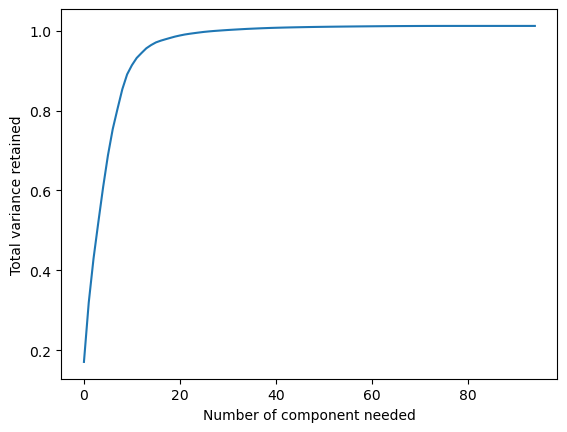

In [60]:
plt.plot(np.cumsum(bank_scaled.explained_variance_))
plt.xlabel ("Number of component needed")
plt.ylabel ("Total variance retained")
plt.show()

In [61]:
pca = PCA(40)

In [62]:
bank = pca.fit_transform(Bank_scaled)
print("original shape:   ", Bank_scaled.shape) 
print("transformed shape:", bank.shape)

original shape:    (6819, 95)
transformed shape: (6819, 40)


In [63]:
column_names=['T1',
'T2',
'T3',
'T4',
'T5',
'T6',
'T7',
'T8',
'T9',
'T10',
'T11',
'T12' ,            
'T13',
'T14',
'T15',
'T16',
'T17',
'T18',
'T19',
'T20', 
'T21',
'T22',
'T23',
'T24',
'T25', 'T26','T27','T28','T29','T30','T31','T32','T33','T34','T35','T36','T37','T38','T39','T40',
 ]

In [64]:
Bankruptcy = pd.DataFrame(bank, columns=[column_names])

In [65]:
Bankruptcy.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40
0,0.389698,-0.196544,-0.061993,-0.341714,-0.205487,-0.155309,-0.181974,-0.250419,-0.271058,-0.290550,...,-0.028272,-0.000711,0.008403,-0.008324,-0.007284,-0.012382,-0.017217,-0.021653,0.001780,-0.005895
1,0.481681,-0.773313,0.618697,0.084185,-0.366930,-0.109342,-0.083648,0.010470,-0.413458,0.082511,...,-0.019687,-0.007343,-0.000854,-0.007525,0.000149,-0.012938,0.003959,-0.003334,-0.000783,0.006483
2,-0.071018,-0.412986,-0.337838,-0.074583,0.048953,-0.203020,-0.210611,0.009771,-0.129326,0.166157,...,0.001257,-0.016162,-0.005261,0.044976,-0.040508,-0.004925,0.008740,-0.000018,-0.002138,-0.001196
3,0.685777,-0.602494,0.343644,-0.228268,-0.484178,-0.132216,-0.056839,0.082115,0.763171,0.180516,...,-0.018400,0.010957,0.002694,-0.013966,-0.004883,0.015782,-0.021621,-0.004532,-0.006852,0.013902
4,0.620666,0.494069,-0.207719,0.189122,-0.247582,-0.154526,-0.074669,0.060977,0.257795,-0.372660,...,0.003313,-0.002195,-0.000459,-0.000851,-0.002386,-0.000445,-0.002746,0.000989,-0.003262,0.010523


In [66]:
x = Bankruptcy
y = df["Bankrupt?"]

In [67]:
pca = PCA(40)
X_pca = pca.fit_transform(x, y)

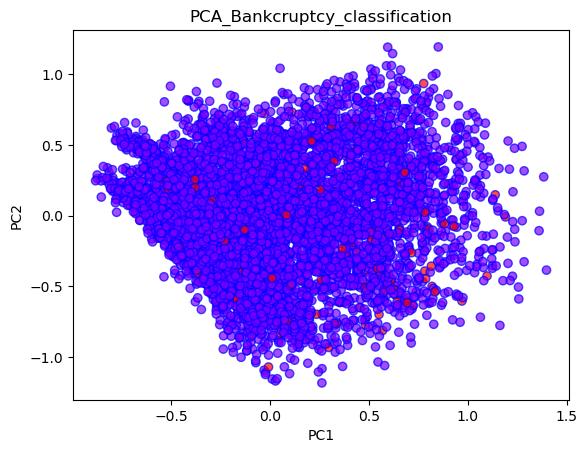

In [69]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA_Bankcruptcy_classification')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [80]:
# SMOTE (to balance the data)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state = 5)
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)

In [81]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
y_pred = dt.predict(X_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78      1318
           1       0.89      0.53      0.66      1318

    accuracy                           0.73      2636
   macro avg       0.78      0.73      0.72      2636
weighted avg       0.78      0.73      0.72      2636



### why we are using only the first and second principal components:

PCA aims to capture the maximum variance in the data with fewer dimensions. By plotting the data using the first two principal components, we can visualize how much of the original variance is retained in a lower-dimensional space. These two components often explain a significant portion of the variance in the data, making them useful for visualization purposes. Additionally, visualizing in two dimensions allows for easier interpretation and understanding of the data distribution.

In summary, implemntation visualizes the data after dimensionality reduction using PCA, focusing on the first two principal components, which are often sufficient to capture a meaningful amount of variance in the data.

# Reinplement thiX!. from lda

### Linear discriminate analysis (LDA)

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [85]:
lda = LinearDiscriminantAnalysis()

In [86]:
X_lda = lda.fit_transform(x, y)

In [87]:
(lda.explained_variance_ratio_)

array([1.])

### Plot LDA classification of bankruptcy

In [88]:
# Import relevant  libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1595,   49],
       [  47,   14]], dtype=int64)

In [92]:
X_test.shape, y_test.shape

((1705, 1), (1705,))

In [93]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.9436950146627566
Precision: 0.2222222222222222
Accuracy: 0.94
Precision: 0.22


In [94]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [95]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1644
           1       0.22      0.23      0.23        61

    accuracy                           0.94      1705
   macro avg       0.60      0.60      0.60      1705
weighted avg       0.94      0.94      0.94      1705



### Pca classification 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=1)

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1586,   58],
       [  48,   13]], dtype=int64)

array([[1586,   58],
       [  48,   13]], dtype=int64)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.9378299120234604
Precision: 0.18309859154929578
Accuracy: 0.94
Precision: 0.18
Accuracy: 0.9378299120234604
Precision: 0.18309859154929578
Accuracy: 0.94
Precision: 0.18


In [47]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1644
           1       0.18      0.21      0.20        61

    accuracy                           0.94      1705
   macro avg       0.58      0.59      0.58      1705
weighted avg       0.94      0.94      0.94      1705

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1644
           1       0.18      0.21      0.20        61

    accuracy                           0.94      1705
   macro avg       0.58      0.59      0.58      1705
weighted avg       0.94      0.94      0.94      1705



In [48]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0, 0.5, 'count')

Text(0, 0.5, 'count')

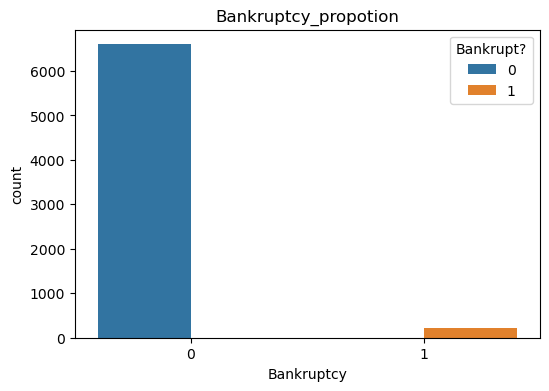

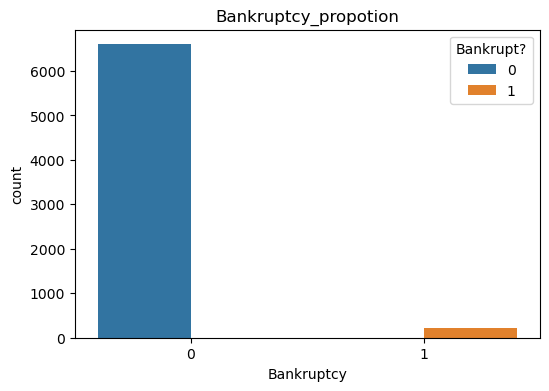

In [49]:
plt.figure(figsize=(6,4)) 
sns.countplot(x='Bankrupt?', data=df, hue= 'Bankrupt?')

plt.title('Bankruptcy_propotion')
plt.xlabel('Bankruptcy')
plt.ylabel('count')

## Evaluating result of PCA and LDA trained models

Evaluating the two sets of 'results evaluation metrics' for DecisionTreeClassifier models for bankruptcy binary classification task where (No bankruptcy: class 0) is the majority class and (Bankrupt: class 1) is the minority class.

Result from the two models shows:

1. **Precision**: Precision measures the proportion of true positive predictions among all positive predictions. It is calculated as TP / (TP + FP), where TP is the number of true positives and FP is the number of false positives. In both models, precision for class 0 (the majority class) is high, around 0.97, this indicates that the model has a high proportion of correct predictions for class 0. However, precision for class 1 (the minority class) is lower, around 0.21 in the first model and 0.19 in the second model, indicating that the model's ability to correctly identify instances of class 1 is not as good.

2. **Recall**: Recall measures the proportion of true positives that were correctly identified by the model. It is calculated as TP / (TP + FN), where FN is the number of false negatives. Similar to precision, recall for class 0 is high in both models, around 0.97, indicating that the model captures most of the instances of class 0. However, recall for class 1 is also low in both models, around 0.25 in the first model and 0.20 in the second model, indicating that the model misses a significant portion of instances of class 1.

3. **F1-score**: F1-score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. It is calculated as 2 * (precision * recall) / (precision + recall). Again, F1-score for class 0 is high in both models, around 0.97, reflecting the high precision and recall for the majority class. However, F1-score for class 1 is low in both models, around 0.23 in the first model and 0.19 in the second model, indicating that the model's performance on the minority class is not satisfactory.

4. **Accuracy**: Accuracy measures the overall correctness of the model's predictions and is calculated as (TP + TN) / (TP + TN + FP + FN), where TN is the number of true negatives. Both models have high accuracy, around 0.94, which suggests that the model performs well in terms of overall correctness. However, accuracy might not be the best metric to evaluate imbalanced datasets since it can be biased towards the majority class.
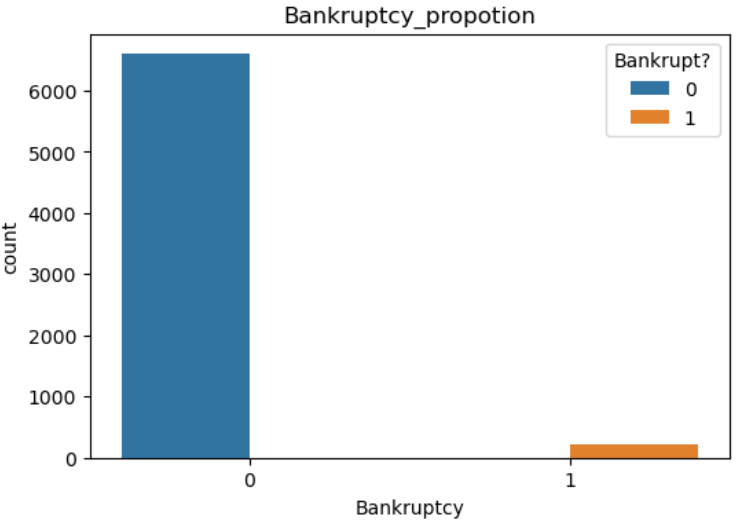
fig.1: Bankruptcy_propotion

### DIfference between PCA and LDA

Comparing both pca and lda trained models, result suggest there is not much difference in their performance metrics. Model based of performance metric performed ignificantly better at predicting (No bankruptcy: class 0) than it did (Bankrupt: class 1). Both models have similar precision, recall, and F1-score for both classes, indicating that they perform similarly on PCA and LDA trained data. However, it's important to note that the models perform significantly better on the majority class (No bankruptcy: class 0) compared to the minority class (Bankrupt: class 1), as reflected by the lower precision, recall, and F1-score for class 1. The significant precision diffrenc can be attributed to the proportion of Bankruptcy data to non-bancruptcy data. In the target variable (Bankruptcy?) as visualized if fig 1, ignificantly less company suffered bankruptcy compared to thoe that did not make the model significantly biased against (Bankrupt: class 1).

### Improvement measure:
1. Class balancing

## Handling imbalance in class variable

I did a value count to see the proportion of each class in the target variable. As shown in output, result shows there are 364 senior respondents, approximately 5 times less than the adult class. This creates an imbalance in the data. Handling the imbalance in the data became imperative after the model result shows good accuracy result, however, I did the confusion matrix to see the accuracy of each class prediction, and the result shows that random forest classified model did well classifying the adult respondents at (20 and 30) % testing size but did very poorly classifying the senior respondents correctly given the same testing size. Both classes at (20 and 30) % testing had an average accuracy of 83 but adult had average precision of 85 given the same circumstance. This is because of imbalance in the target, it means the model is bias towards the adult respondents because it had more training data for the adult than for senior respondents. 

In [50]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 


# SMOTE (to balance the data)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 5)
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)

In [51]:
# SMOTE (to balance the data)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 5)
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)

In [52]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((10562, 40), (2636, 40), (10562,), (2636,))

((10562, 40), (2636, 40), (10562,), (2636,))

In [53]:
#Train the model using the training sets y_pred=clf.predict(X_test)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

DecisionTreeClassifier()

In [54]:
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76      1318
           1       0.89      0.47      0.61      1318

    accuracy                           0.70      2636
   macro avg       0.76      0.70      0.69      2636
weighted avg       0.76      0.70      0.69      2636

              precision    recall  f1-score   support

           0       0.64      0.94      0.76      1318
           1       0.89      0.47      0.61      1318

    accuracy                           0.70      2636
   macro avg       0.76      0.70      0.69      2636
weighted avg       0.76      0.70      0.69      2636



### Goal to implement
1. Apply smote on the imbalaced data first
2. Apply pca and lda on the balanced dataset
3. Implementing KNNclassification on bankruptcy data (lda and pca) trained.